In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.path as mpath

### Our units:
{lat: (-90, 90), lon: (-180, 180) depth: m, pigments: ug/L, chemtax: ratio, timestamp: YYYY-MM-DD HH:MI:SS, 
chl_a_fluor: mg/m^3 OR ug/L, salinity: psu OR nan, temperature: C, part_org_carbon: ug/L, oxygen: mg/L, nitrate: umol/L, phosphate: umol/L, silicate: umol/L}

### Dataset units
{lat: (0, 360), depth: m, pigments: ug/L, }

In [2]:
lter1 = pd.read_csv("../../data/datasets/unmodified/lter2022/AntarcticaLTERcompiledData_Cruise_forEDI.csv")
lter2 = pd.read_csv("../../data/datasets/unmodified/lter2022/AntarcticaLTERcompiledData_Station_forEDI.csv")

lter_sql: dict = {
    'studyName': 'cruise', 'DatetimeGMT': 'timestamp', 'Latitude': 'latitude',
    'Longitude': 'longitude', 'Depth': 'depth', 'Temperature': 'temperature',
    'Salinity': 'salinity', 'Oxygen': 'oxygen', 'PAR': 'par',
    'Chlorophyll': 'chl_a_fluor', 'Prasinophytes': 'chemtax_prasinophytes',
    'Cryptophytes': 'chemtax_cryptophytes', 'MixedFlagellates': 'chemtax_mixed_flagellates',
    'Diatoms': 'chemtax_diatoms', 'Haptophytes': 'chemtax_haptophytes',
    'Alloxanthin': 'hplc_allo', 'AlphaCarotene': 'hplc_alpha_car',
    'BetaCarotene': 'hplc_beta_car', 'x19butanoyloxyfucoxanthin': 'hplc_but_fuco',
    'Fucoxanthin': 'hplc_fuco', 'x19hexanoyloxyfucoxanthin': 'hplc_hex_fuco', 
    'Chlorophylla': 'hplc_tot_chl_a','Diadinoxanthin': 'hplc_diadino','Diatoxanthin': 'hplc_diato',
    'Zeaxanthin': 'hplc_zea', 'Chlorophyllc3': 'hplc_chl_c3', 'Chlorophyllide': 'hplc_chlide_a',
    'DivinylChlorophylla': 'hplc_dv_chl_a', 'Lutein': 'hplc_lut', 'Neoxanthin': 'hplc_neo',
    'Prasinoxanthin': 'hplc_pras', 'Violaxanthin': 'hplc_viola', 'Peridinin': 'hplc_perid',
    'Chlorophyllb': 'hplc_tot_chl_b', 'POC': "poc", 'PO4': 'phosphate', 'NO3': 'nitrate',
    'NO2': 'nitrite', 'SiO2': 'silicate', 'DIC1': 'dic' 
}


lter1 = lter1.rename(columns=lter_sql)
lter2 = lter2.rename(columns=lter_sql)
lter = pd.concat([lter1, lter2])

# Know alpha_beta_car is sum of alpha and beta from kramer and siegel paper def. 
lter["hplc_alpha_beta_car"] = lter["hplc_alpha_car"] + lter["hplc_beta_car"]
lter['source'] = 'lter2022'
lter["hplc_present"] = 1
lter["chemtax_present"] = 1
lter["microscopy_present"] = 1
lter["ifcb_present"] = 0
lter

,cruise,timestamp,JulianDay,Event,GridLine,GridStation,RoundedGridLine,RoundedGridStation,GridRegion,NorthSouthRegion,...,Notes1,Notes2,NominalStation,Chlorophyllc1,hplc_alpha_beta_car,source,hplc_present,chemtax_present,microscopy_present,ifcb_present
0,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,*Only T and S available for CTD - from BOPS - ...,NaN,NaN,NaN,NaN,lter2022,1,1,1,0
1,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,"**HPLC in datazoo file listed as ug/L, but act...",NaN,NaN,NaN,NaN,lter2022,1,1,1,0
2,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,lter2022,1,1,1,0
3,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,lter2022,1,1,1,0
4,PD91-09,1991-11-07 00:36:00,311.0,1.0,619.0,35.0,600.0,40.0,NC,N,...,NaN,NaN,NaN,NaN,NaN,lter2022,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19341,PAL2021,2021-05-04 00:00:00,124.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,E,NaN,NaN,lter2022,1,1,1,0
19342,PAL2021,2021-05-04 00:00:00,124.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,E,NaN,NaN,lter2022,1,1,1,0
19343,PAL2021,2021-05-04 00:00:00,124.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,E,NaN,NaN,lter2022,1,1,1,0
19344,PAL2021,2021-05-04 00:00:00,124.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,E,NaN,NaN,lter2022,1,1,1,0


In [3]:
lter.columns.values

array(['cruise', 'timestamp', 'JulianDay', 'Event', 'GridLine',
       'GridStation', 'RoundedGridLine', 'RoundedGridStation',
       'GridRegion', 'NorthSouthRegion', 'InshoreOffshoreRegion',
       'latitude', 'longitude', 'BottleNumber', 'depth', 'temperature',
       'salinity', 'Density', 'BeamTransmission', 'oxygen',
       'OxygenSaturation', 'par', 'Fluorescence', 'chl_a_fluor',
       'Phaeopigment', 'FilterCode', 'hplc_chl_c3', 'hplc_chlide_a',
       'Chlorophyllc2', 'hplc_perid', 'Phaeophorbide', 'hplc_but_fuco',
       'hplc_fuco', 'hplc_neo', 'hplc_pras', 'hplc_hex_fuco',
       'hplc_viola', 'hplc_diadino', 'Antheraxanthin', 'hplc_allo',
       'hplc_diato', 'hplc_zea', 'hplc_lut', 'Crocoxanthin',
       'hplc_tot_chl_b', 'Echinenone', 'hplc_dv_chl_a', 'hplc_tot_chl_a',
       'Lycopene', 'Phaeophytin', 'hplc_alpha_car', 'hplc_beta_car',
       'chemtax_prasinophytes', 'chemtax_cryptophytes',
       'chemtax_mixed_flagellates', 'chemtax_diatoms',
       'chemtax_haptophy

In [6]:
lter.columns

Index(['cruise', 'timestamp', 'JulianDay', 'Event', 'GridLine', 'GridStation',
       'RoundedGridLine', 'RoundedGridStation', 'GridRegion',
       'NorthSouthRegion', 'InshoreOffshoreRegion', 'latitude', 'longitude',
       'BottleNumber', 'depth', 'temperature', 'salinity', 'Density',
       'BeamTransmission', 'oxygen', 'OxygenSaturation', 'par', 'Fluorescence',
       'chl_a_fluor', 'Phaeopigment', 'FilterCode', 'hplc_chl_c3',
       'hplc_chlide_a', 'Chlorophyllc2', 'hplc_perid', 'Phaeophorbide',
       'hplc_but_fuco', 'hplc_fuco', 'hplc_neo', 'hplc_pras', 'hplc_hex_fuco',
       'hplc_viola', 'hplc_diadino', 'Antheraxanthin', 'hplc_allo',
       'hplc_diato', 'hplc_zea', 'hplc_lut', 'Crocoxanthin', 'hplc_tot_chl_b',
       'Echinenone', 'hplc_dv_chl_a', 'hplc_tot_chl_a', 'Lycopene',
       'Phaeophytin', 'hplc_alpha_car', 'hplc_beta_car',
       'chemtax_prasinophytes', 'chemtax_cryptophytes',
       'chemtax_mixed_flagellates', 'chemtax_diatoms', 'chemtax_haptophytes',
       '

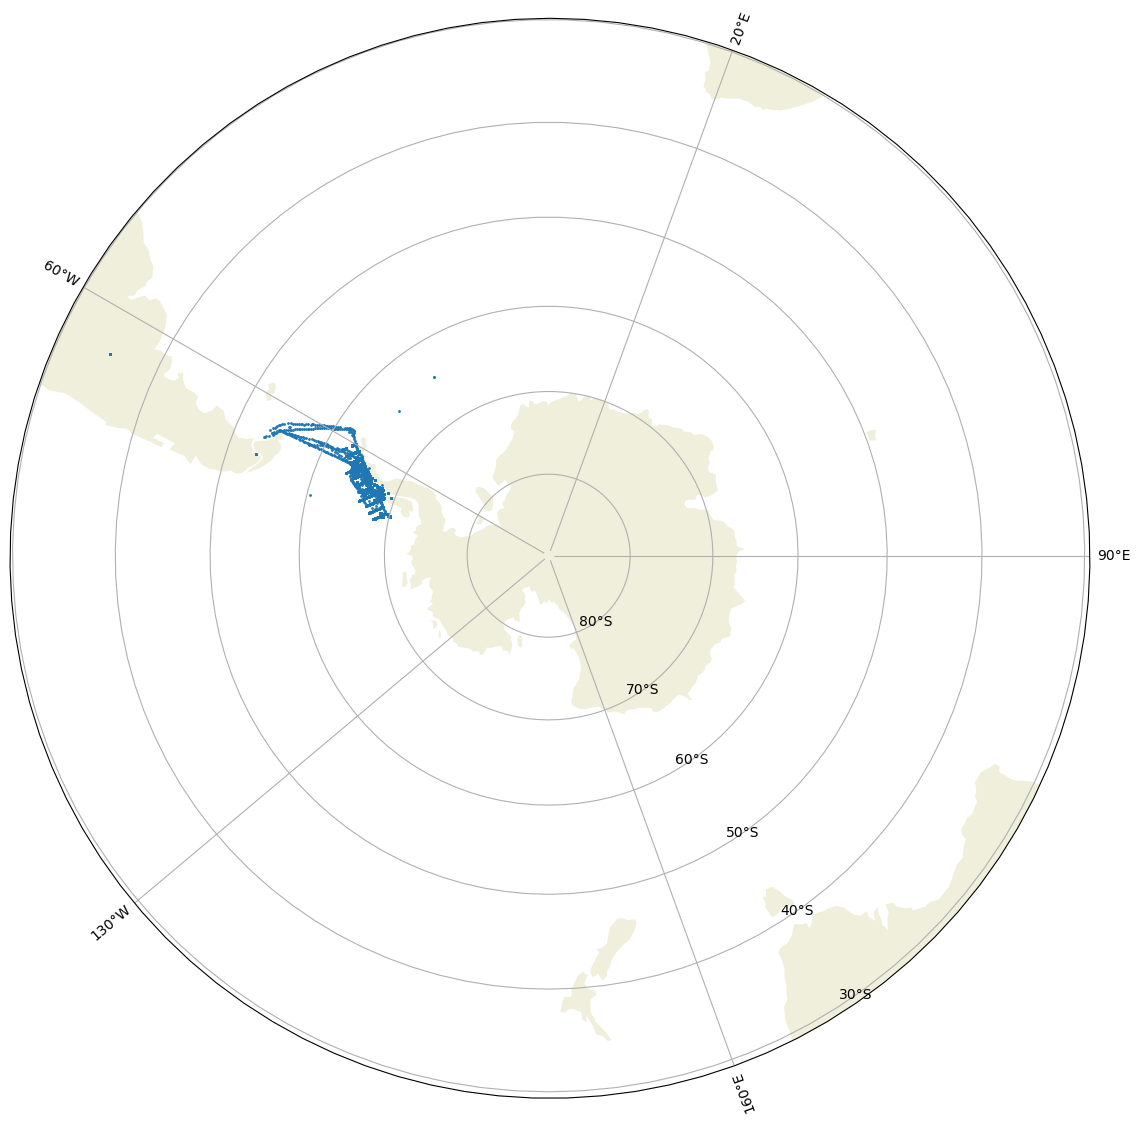

In [4]:
def so_map_ax() -> plt.axes:
    map_proj = ccrs.SouthPolarStereo()
    fig = plt.figure(figsize=[12, 12])  # inches
    ax = plt.subplot(projection=map_proj)
    ax.set_extent([-180, 180, -90, -29.4], ccrs.PlateCarree())
    fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
    ax.add_feature(cartopy.feature.LAND)
    ax.gridlines(xlocs=[-130, -60, 20, 90, 160], draw_labels=True)
    theta  = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5  ## could use 0.45 here, as Simon Thomas did
    verts  = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform = ax.transAxes)
    return ax

# plot the amt points on the SO map
so_map = so_map_ax()
so_map.scatter(lter.longitude, lter.latitude, transform=ccrs.PlateCarree(), s=1)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5000e+01,
        1.3000e+02, 9.4000e+01, 8.1000e+01, 9.0000e+01, 2.0600e+02,
        2.2200e+02, 4.8400e+02, 8.8200e+02, 1.3770e+03, 1.0960e+03,
        4.6500e+02, 8.3300e+02, 1.3300e+03, 1.8420e+03, 1.2920e+03,
        1.7580e+03, 1.6250e+03, 5.4900e+02, 1.8590e+03, 1.8450e+03,
        2.4963e+04, 1.7130e+03, 1.3130e+03, 1.1890e+03, 8.1000e+02,
        4.2300e+02, 1.1200e+02, 1.4900e+02, 1.6200e+02, 5.0000e+00,
        1.9000e+01, 2.9000e+01, 1.4000e+01, 8.0000e+00, 6.0000e+00,
        8.0000e+00, 4.0000e+00, 6.0000e+00, 9.0000e+00, 8.0000e+00,
        5.0000e+00, 8.0000e+00, 6.0000e+00, 9.0000e+00, 7.0000e+00,
        5.0000e+00, 8.0000e+00, 1.7000e+01, 4.0000e+00, 7.0000e+00,
        5.0000e+00, 6.0000e+00, 5.0000e+00, 5.00

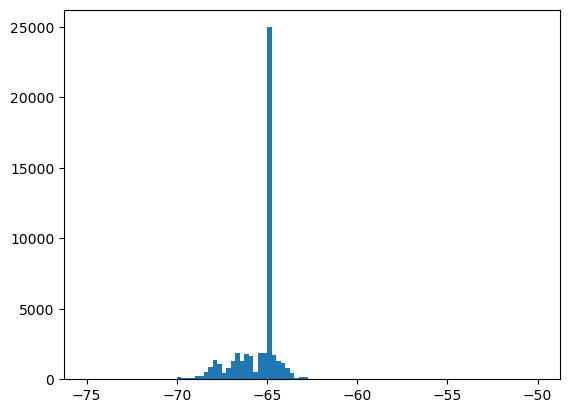

In [17]:
plt.hist(lter.latitude, range=[-75, -50], bins=100)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2000e+01, 5.3000e+01, 3.3000e+01, 3.1000e+01, 5.1000e+01,
        2.7000e+01, 8.4000e+01, 1.1600e+02, 1.1600e+02, 2.4700e+02,
        7.1000e+01, 8.1000e+01, 6.8000e+01, 9.4000e+01, 1.1200e+02,
        9.5000e+01, 1.2500e+02, 1.5300e+02, 3.2400e+02, 3.9800e+02,
        4.6300e+02, 3.1100e+02, 3.9400e+02, 8.1600e+02, 5.6200e+02,
        7.1600e+02, 7.1800e+02, 6.9400e+02, 1.2900e+03, 1.2620e+03,
        1.0860e+03, 1.0410e+03, 3.7200e+02, 6.5200e+02, 9.7600e+02,
        7.8700e+02, 9.0300e+02, 1.0020e+03, 1.0090e+03, 1.1830e+03,
        9.1700e+02, 9.6000e+02, 4.1500e+02, 5.9400e+02, 6.9300e+02,
        9.8500e+02, 1.3170e+03, 3.2360e+03, 2.0386e+04, 2.1100e+02,
        8.8000e+01, 1.8200e+02, 2.7200e+02, 5.0000e+01, 5.7000e+01,
        4.5000e+01, 3.5000e+01, 2.2000e+01, 2.2000e+01, 4.5000e+01,
        2.9000e+01, 6.8000e+01, 2.6000e+01, 3.0000e+00, 5.0000e+00,
        4.0000e+00, 6.0000e+00, 5.0000e+00, 4.00

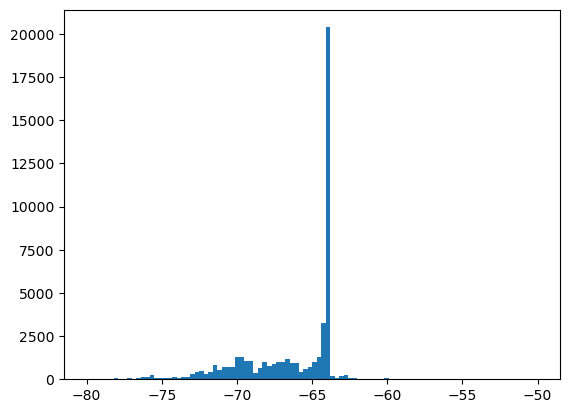

In [21]:
plt.hist(lter.longitude, range=[-80, -50], bins=100)

In [5]:
lter.to_csv("../../data/datasets/modified/lter2022/lter2022_sample.csv", index=False)